# Loading and preprocessing

In [71]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer 
import numpy as np

In [72]:
jobls = []
for i in range(1,30):
    my_file = open('descs_soup'+str(i)+'.txt', "r",encoding="utf-8")
    content = my_file.read()
    content_list = content.split("JD TERMINATED")
    jobls += content_list

In [73]:
len(jobls)

754

In [74]:
word_list = []
for i in jobls:
    word_list.append(nltk.word_tokenize(i))

In [75]:
df = pd.DataFrame(jobls)

### Lemmatization

In [76]:
print(word_list)
lemmatizer = WordNetLemmatizer()
jb1 = []
for i in word_list:
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in i])
    jb1.append(lemmatized_output)
print(jb1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [77]:
stopwords = set(STOPWORDS)
# selecting useless words
badwords = {'application', 'Apply', 'salary', 'company', 'identity', 'sexual', 'orientation', 'free', 'Full',
            'England','United Kingdom', 'UK', 'InMail', 'United', 'Kingdom', 'looking','based','required'
            'send', 'match', 'London','role','develop','jobYour','skills', 'school alumni', 'posted','desirable',
            'requirement','opportunities','within','offer''good','required','posted', 'save', 'working', 'will', 
            'help', 'show', 'applicant', 'strong', 'option', 'mid', 'across', 'yr', 'work', 'benefit', 'level', 'one', 
            'skill', 'build', 'easy', 'easy','job', 'school', 'alumnus','Nigel Frank', 'week ago', 'new', 'including', 
            'provide', 'available','environment','send','high','using','meet','Frank','please','requirements','use',
            'able'}

# deleting the useless words on plot
stopwords.update(badwords)

# The wordcloud

In [78]:
wordcloud = WordCloud(width = 1200, height = 800, background_color='black',
                      stopwords=stopwords,
                      random_state=42).generate("".join(jb1))

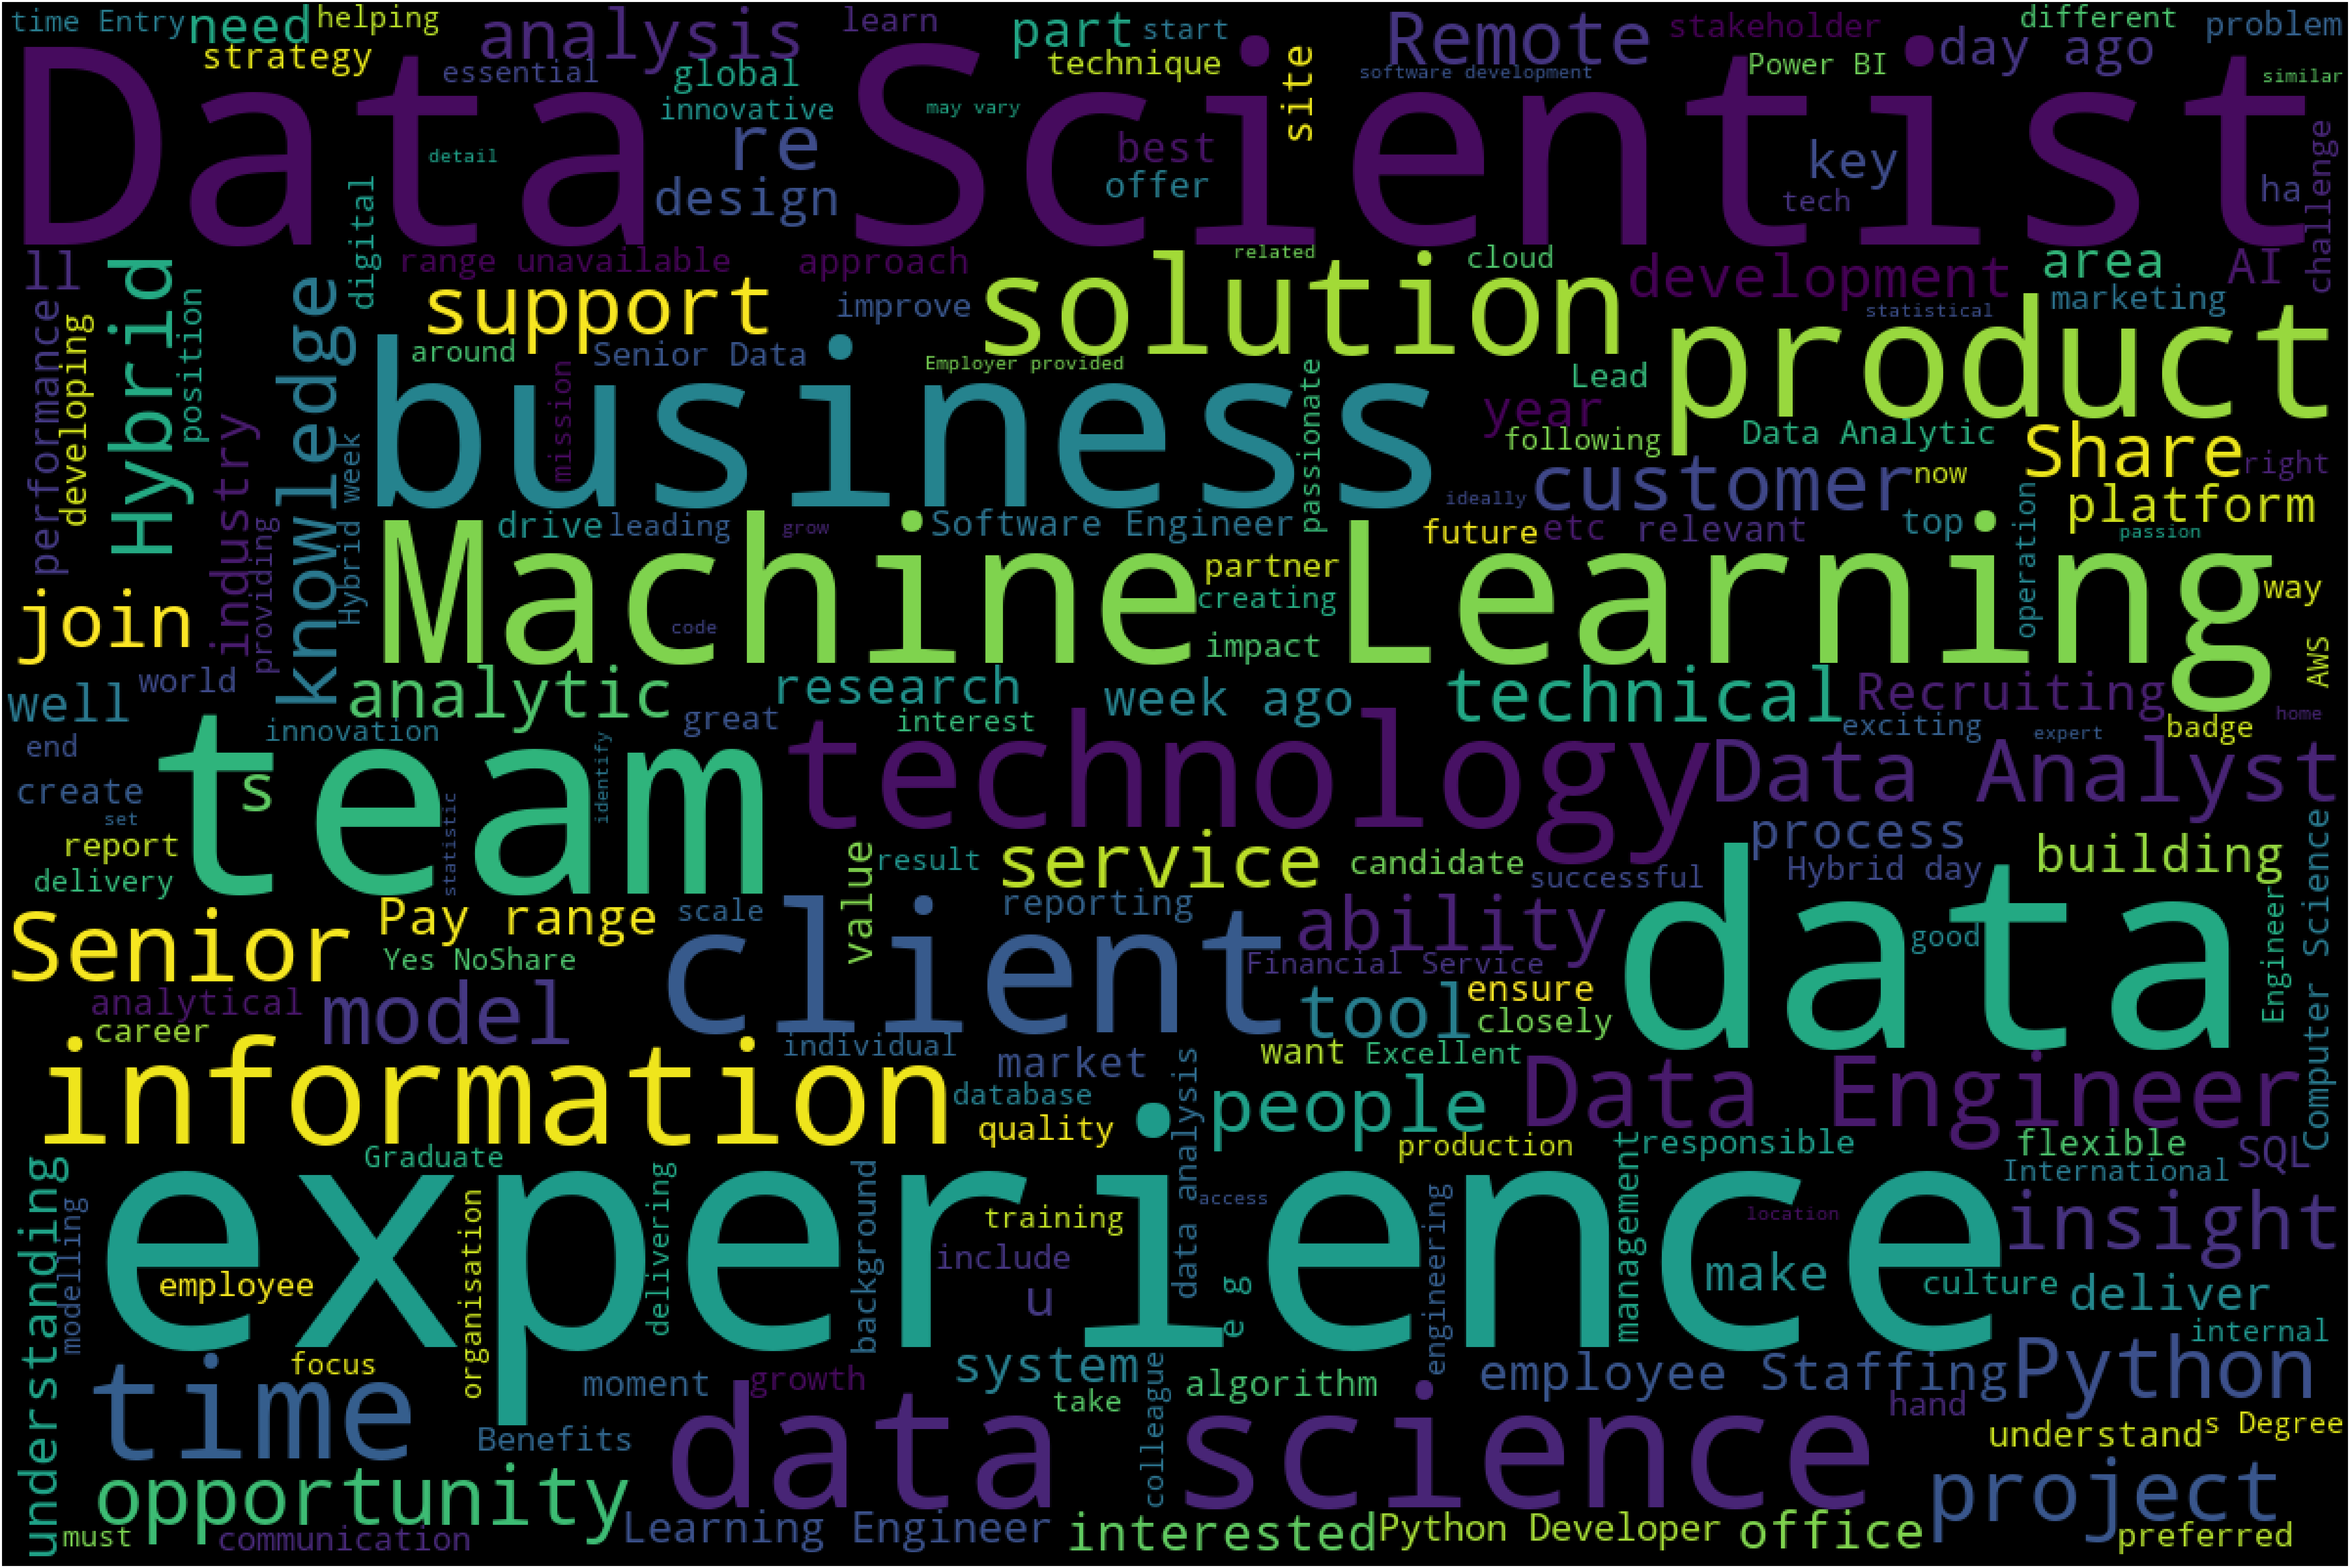

In [79]:
print(wordcloud)
plt.figure(figsize=(200, 100))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The most common word was Data which comes as no surprise. 
The word team was also quite common, which shows how important team work is for securing and being successful at a job.
Despite the fact the search was for graduate roles, experience was still amongst the most desired requirements. This is slightly concerning.
Python, Machine learning, client, business, technology, solution, data science, product, support, development and time were some of the most occuring buzz words.

# TF-IDF Analysis

In [80]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer(input='content', stop_words='english')
dtm = vectorizer.fit_transform(jb1).toarray()
vocab = np.array(vectorizer.get_feature_names())
dtm.shape, len(vocab)

C:\Users\srika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


((754, 13604), 13604)

In [81]:
vocab

array(['00', '000', '000100', ..., 'zoopla', 'zuckerberg', 'zudovas'],
      dtype='<U60')

In [82]:
scores = {'Words': vocab,'Scores':sum(dtm)}
word_scores = pd.DataFrame(data = scores)
word_scores.sort_values(by = ['Scores'],inplace = True, ascending = False)

### Top 50 key words

In [83]:
word_scores[0:50]

,Words,Scores
3317,data,98.537990
10738,save,37.215249
10836,scientist,36.378719
4367,engineer,34.078919
11230,skill,29.911965
4758,experience,29.618106
12214,team,26.016028
1018,analyst,25.958345
7227,london,25.327956
7009,learning,25.211307


### Checking the scores of custom key words

In [84]:
freq_check = ['python','sql','junior','senior', 'graduate'
             'marketing', 'customer','market',
              'estate',
              'product','research','analytics',
             'statistics','modelling',
             'financial','fintech',
             'deep','neural',
              'machine', 'scientist','analyst'
             ]

In [85]:
word_scores[word_scores.Words.isin(freq_check)]

,Words,Scores
10836,scientist,36.378719
1018,analyst,25.958345
7307,machine,22.281516
9737,python,20.681354
1045,analytics,19.113874
10973,senior,15.783618
9467,product,14.396966
10303,research,13.510563
3244,customer,11.141880
11603,sql,10.964313


With the above scores it is seen that the socre of scientist is much higher than the score for analyst. The most plausible explaination for this is that the number of Data scientist roles was much higher than the number of data analyst roles. Similarly, there are a lot more senior role opportunities compared to the junior opportunities.